In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for inline plots in jupyter
%matplotlib inline 

data_path = "Marketing_Campaign_Train.csv"

data = pd.read_csv(data_path)

In [ ]:
#Shape of data.csv we have 1680 rows and 29 columns
print("Shape: ", data.shape)

In [ ]:
data.info() #Seeing names of columns

Here we see the types of all the data. As it says in the bottom line there are 64 float types, and 3 ints and objects.

Below this we have the describe function showing important information about the attributes

In [ ]:
distrib = data.describe(include='all')
distrib

From the 75% row we see that the majority of people don't respond nor complain on campaigns.

The mean row shows that there is little response to all campaigns.

In [ ]:
data.std(numeric_only=True).max() #This is the value of the income as can be seen in the table above

This means that there is a large gap between the smallest and largest incomes

In [ ]:
numeric_col = data.describe().columns # to get the numeric column
numeric_data = data[numeric_col] #getting the numeric columns
numeric_data

In [ ]:
data.head() #comparing with columns in head we can see the Education,Status and Registration_date columns are missing in the numerical data

In [ ]:
nominal_data = data.drop(numeric_col, axis=1) #removing the numeric columns gives us the remaining columns
culledData = numeric_data.drop(['ID','Revenue','Cost_Contact'], axis=1)

In [ ]:
distrib = culledData.describe(include='all')
distrib.loc["median"] = culledData.median()
distrib

d:\Documents\University\Year_4\2nd Semester\Data mining\datamine\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


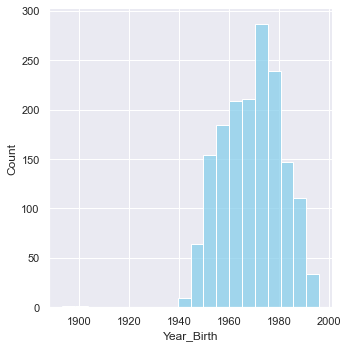

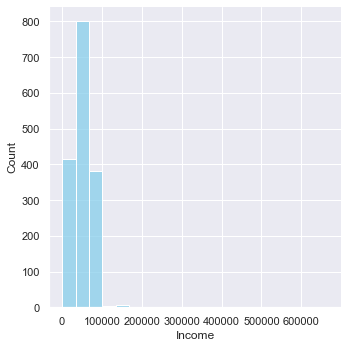

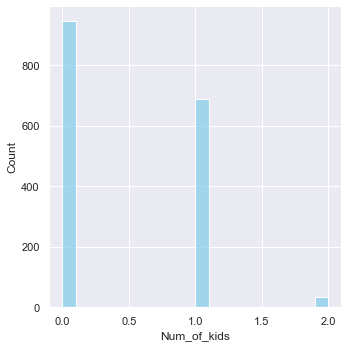

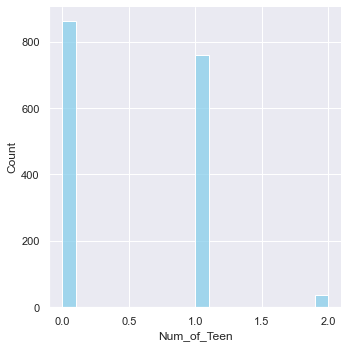

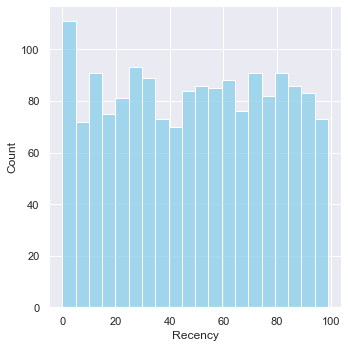

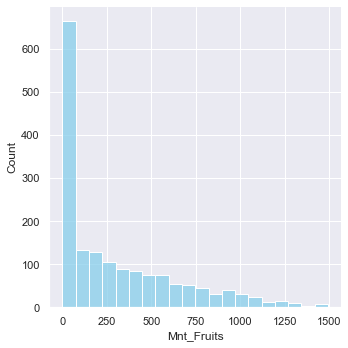

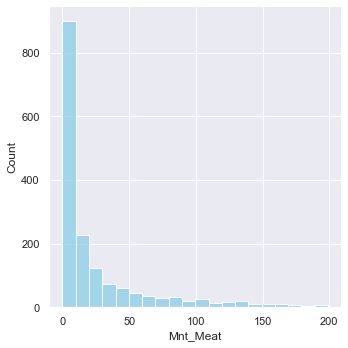

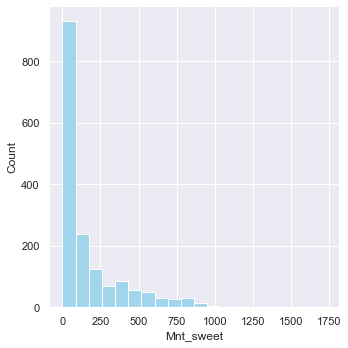

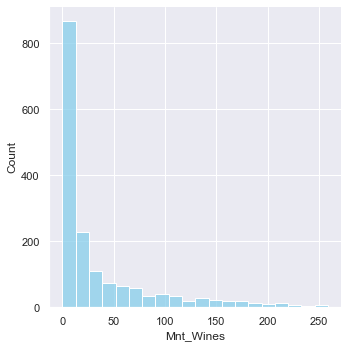

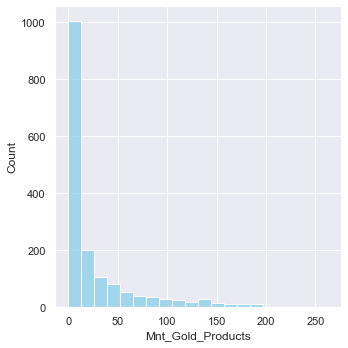

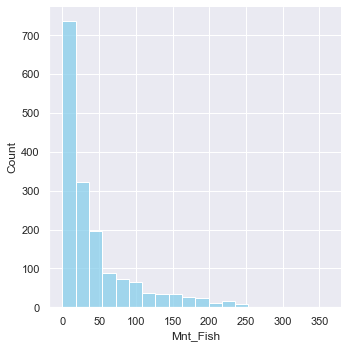

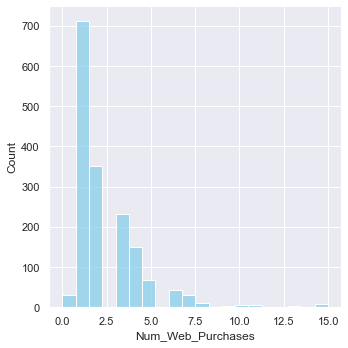

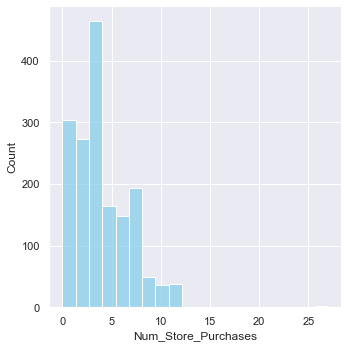

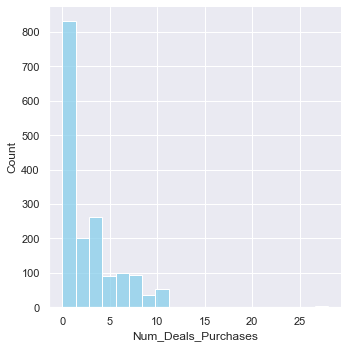

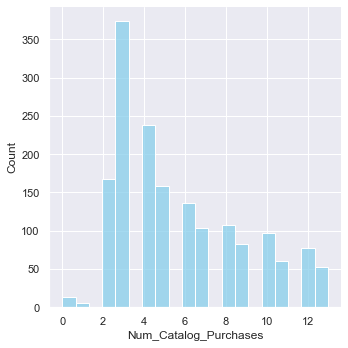

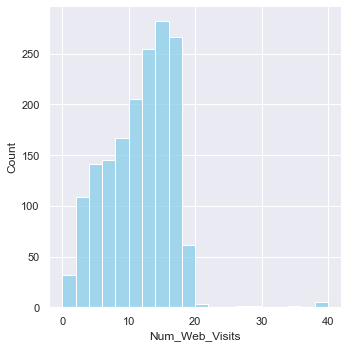

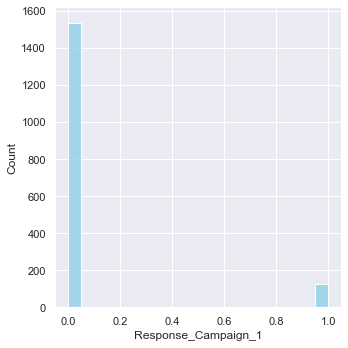

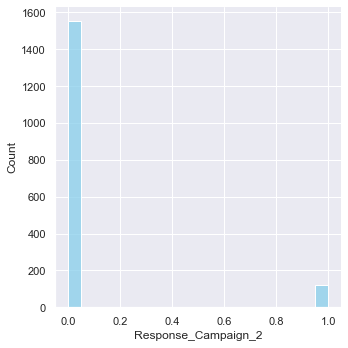

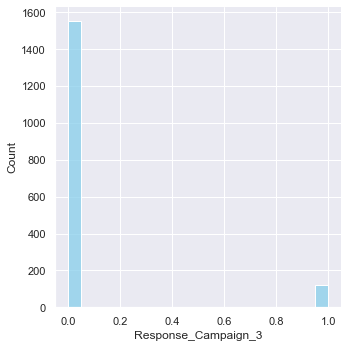

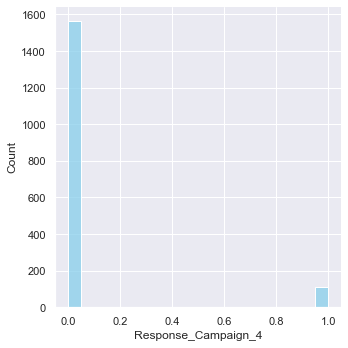

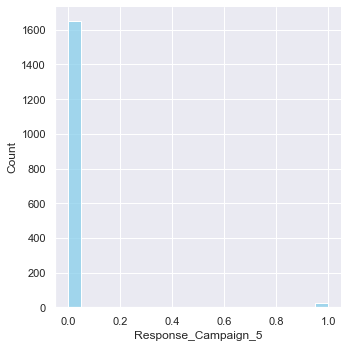

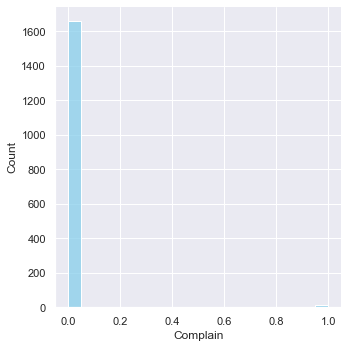

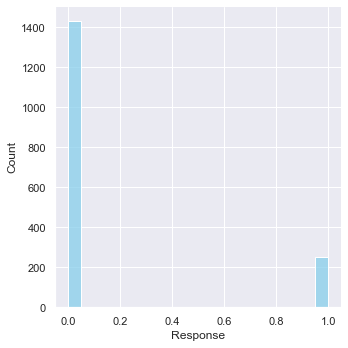

In [167]:
for col in culledData:
    sns.displot(culledData[col], bins=20, color='skyblue') 

In [ ]:
for col in culledData:
    print(col, ' skewness:', culledData[col].skew(axis = 0, skipna = True) )

High skew values in Complain, Income, and Response_Campaign_5

The skewness increases with the campaign number. As such, we summise that future campaigns are less fruitfull.

Income also had a high std value. We should normalize the income to smaller numbers

Next, we want to show the correlation between each of the factors to the response rate. (Speaking only of the relevant columns in the culled data)

The correlation with reposne to campaign 3 is the highest at 0.331.

In [ ]:
maxft = ""
maxcr = 0
correlationData = culledData.drop(['Response'],axis=1)
for feature in correlationData.keys():
    print(feature,": ")
    cor = culledData[feature].corr(culledData['Response'])
    if cor > maxcr:
        maxft = feature
        maxcr = cor
    print(cor)
print("\nFeature with max correlation:", maxft,"\nwith correlation:", maxcr)

From the correlation data it can be inferred that the things with the strongest effect on the response of client to the last campaign are:

The third campaign, fourth campaign, campain 1 with the amount of fruits, and lastly the amount of sweets.

Meanwhile we notice that recency has a strong backwards correlation with the response. Meaning the more time that passes from the last purchase the chance for a new purchase is less likely.

Below we show using the jinja2 library the correlation between all features

In [ ]:
corr = culledData.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

In [ ]:
target =pd.DataFrame(data['Status']) 
sns.displot(target, x='Status', color='skyblue', discrete=True)

['Widow' 'Married' 'Divorced' 'Single' 'Together' 'Unknown']


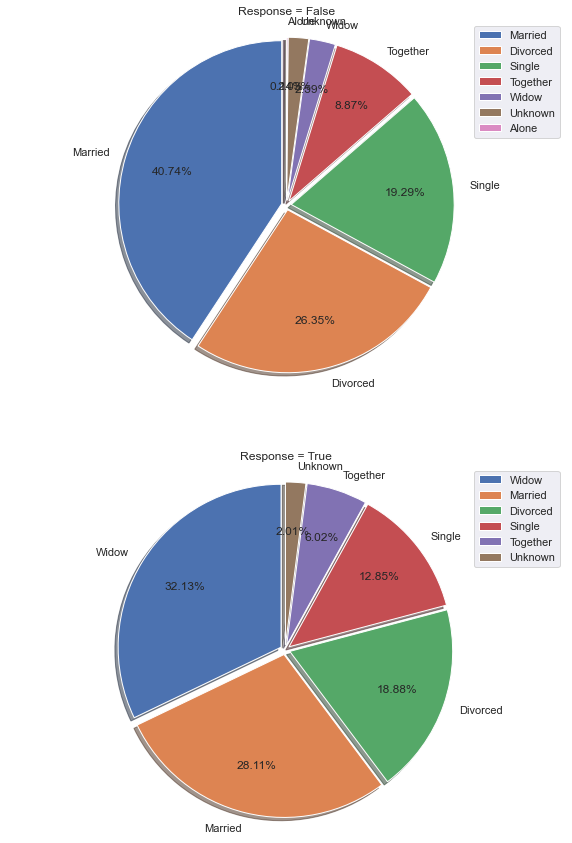

In [138]:
data[nominal_data.columns] = data[nominal_data.columns].fillna("Unknown")
target = data['Status'].unique()


fig1,(ax1,ax2) = plt.subplots(2,1,figsize=(10,15))
ax1.pie(data['Status'][data['Response']==False].value_counts(), labels=target, labeldistance=1.1, pctdistance=0.7, autopct='%0.2f%%', shadow=True, startangle=90,explode=[0.03,0.03,0.03,0.03,0.03,0.03,0.03])
ax1.axis('equal') 
ax1.set_title('Response = False')
fig1.set_facecolor('white')
target = data['Status'][data['Response']==True].unique()
ax2.pie(data['Status'][data['Response']==True].value_counts(), labels=target, labeldistance=1.1, pctdistance=0.7, autopct='%0.2f%%', shadow=True, startangle=90,explode=[0.03,0.03,0.03,0.03,0.03,0.03])
ax2.axis('equal')
ax2.set_title('Response = True')
ax1.legend()
ax2.legend()
plt.show()

Notice there are no alone people who responeded to the campaigns

<AxesSubplot:>

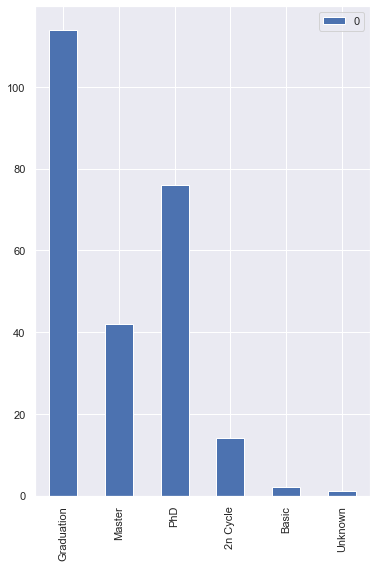

In [173]:
labels = data['Education'][data['Response'] ==False].unique() #take all types of peole who didn't respond
count={}
for i,label in enumerate(labels):
    count[label]=data['Response'][data['Education']==label].value_counts().get(1) #get the number per labe in education
plot = pd.DataFrame.from_dict(count,orient='index') #show how many there are
plot.plot(kind='bar')

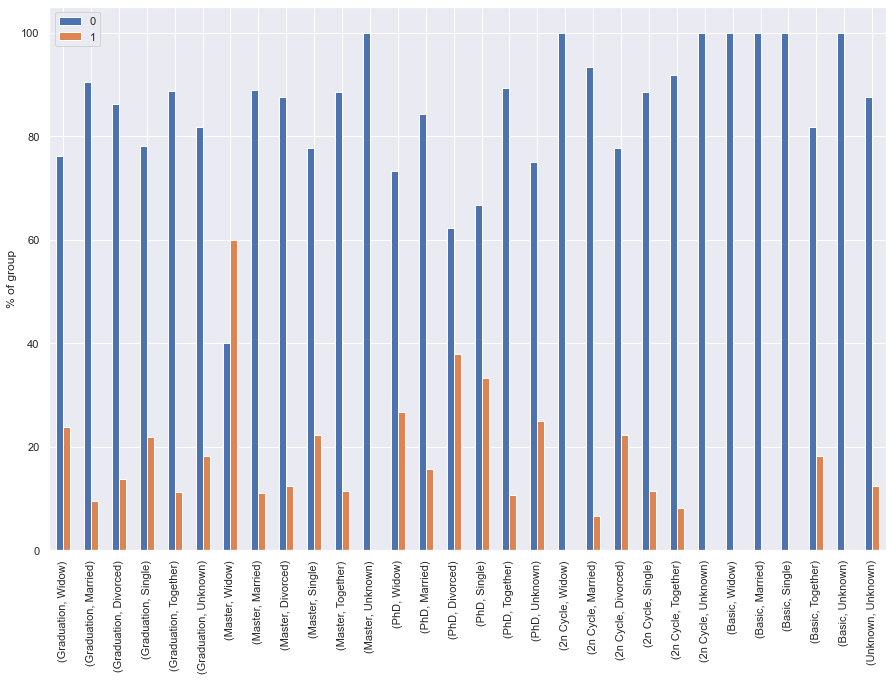

In [193]:
labelSet1 = data['Education'][data['Response']==True].unique()
labelSet2 = data['Status'][data['Response']==True].unique()

responsePrecentage = {}
for i,label1 in enumerate(labelSet1):
    for j,label2 in enumerate(labelSet2):
        responsePrecentage[(label1,label2)] = data['Response'][data['Education']==label1][data['Status']==label2].value_counts(normalize=True)*100
plot = pd.DataFrame.from_dict(responsePrecentage,orient='index').plot(kind='bar',figsize=(15,10),ylabel='% of group') #show how many there are
